In [1]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("D:/Programing/VS_code/Random files/diabetes_binary_health_indicators_BRFSS2015.csv")
# information about dataset
# print("info = ", df.info)

In [2]:
# data cleaning
print("shape = ", df.shape)
df.drop_duplicates()
print("shape after removing duplicates", df.shape)
print("null values are","\n",df.isnull().sum())


shape =  (253680, 22)
shape after removing duplicates (253680, 22)
null values are 
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


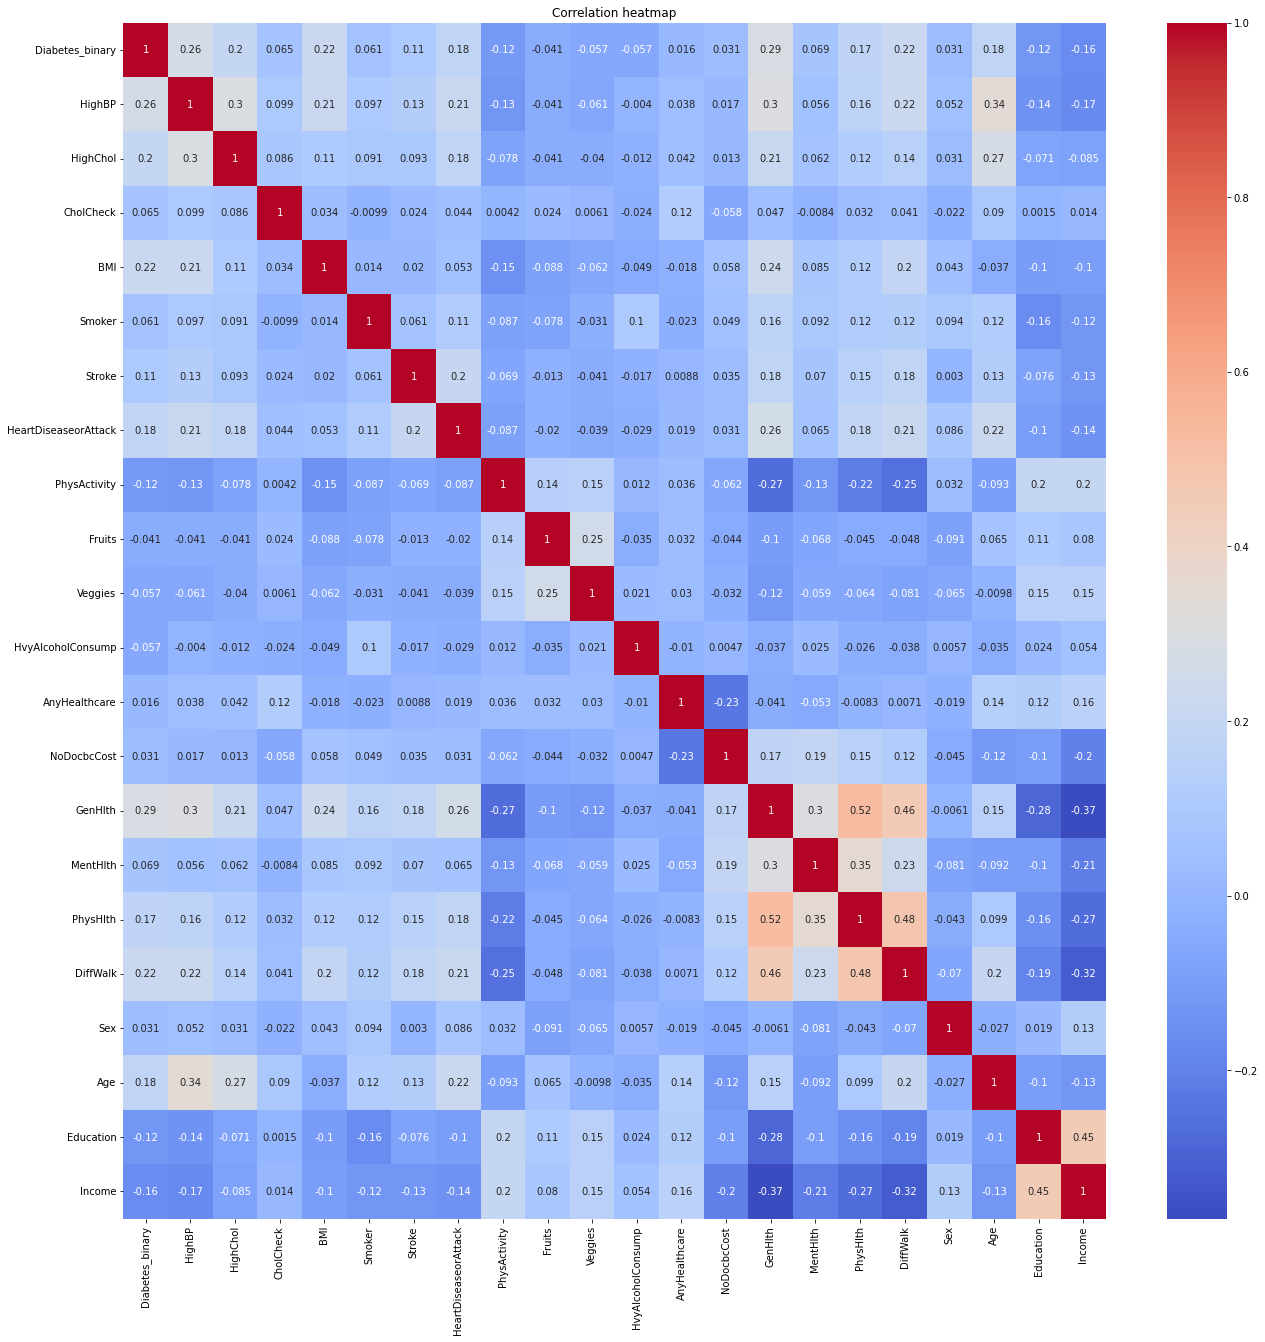

In [3]:
# visualize correlation by heatmap
correlation = df.corr()
plt.figure(figsize=(22, 22))
g = sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title( "Correlation heatmap")
plt.show()

In [4]:
# selecting the most important features
cor_diabetes = abs(correlation["Diabetes_binary"])
select_feat = cor_diabetes[cor_diabetes>0.17]
print("........................................................")
print("features are","\n",select_feat)

........................................................
features are 
 Diabetes_binary         1.000000
HighBP                  0.263129
HighChol                0.200276
BMI                     0.216843
HeartDiseaseorAttack    0.177282
GenHlth                 0.293569
PhysHlth                0.171337
DiffWalk                0.218344
Age                     0.177442
Name: Diabetes_binary, dtype: float64


In [8]:
# split data into x and y
x = df[["HighBP" ,"HighChol","BMI" ,"HeartDiseaseorAttack","GenHlth" ,"PhysHlth" ,"DiffWalk" ,"Age"]]
y = df.Diabetes_binary

# Datascaling by standard scaler
from sklearn.preprocessing import StandardScaler
# fig, ax = plt.subplots(figsize=(12, 4))
scaler=StandardScaler()
ssx=scaler.fit_transform(x)
# ax.scatter(ssx[:,0],y)
# ax.scatter(ssx[:,1],y)
# plt.title( "scatter plot of standard scaler")
# plt.show()

In [12]:
# split data into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(ssx, y, test_size=0.2, random_state=42)


# Balancing
from collections import Counter
print(".................................................................................")
print(f"Training target statistics before oversampling: {Counter(y_train)}")
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics after oversampling: {Counter(y_res)}")

.................................................................................
Training target statistics before oversampling: Counter({0.0: 174595, 1.0: 28349})
Training target statistics after oversampling: Counter({0.0: 174595, 1.0: 174595})


accuracy of lr=  85.74187953327026 %
the number of correct prediction of logisitc regression is: 43502
the number of incorrect predictions of logisitc regression is: 7234
[[42241  1498]
 [ 5736  1261]]


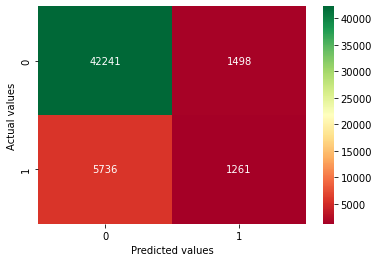

In [14]:
# # training and fitting Logistic Regression to model
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(solver="saga", random_state=0)
# lr.fit(x_train, y_train)

# # Saving model into a file 
# joblib.dump(lr,'logistic_regression_model')

#Loading the model
lr_loaded = joblib.load('logistic_regression_model')
# Making predicition on logisitic regression
lr_pre = lr_loaded.predict(x_test)
# Calculating accuracy of logisitic regression
accuracy = lr_loaded.score(x_test, y_test)
print("accuracy of lr= ", accuracy * 100, "%")
#the number of correct and incorrect prediction
print("the number of correct prediction of logisitc regression is:" ,sum(lr_pre==y_test))
print("the number of incorrect predictions of logisitc regression is:",sum(lr_pre!=y_test))

# Making confusion matrix on logisitic regression
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_pre)
print(cm)
h = sns.heatmap(cm, annot=True, cmap="RdYlGn", fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()

(50736,)
the number of correct prediction of svm is: 43770
the number of incorrect predictions of svm is: 6966
accuracy of svm=  86.27010406811732 %
[[43156   583]
 [ 6383   614]]


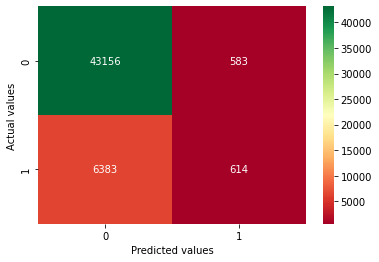

In [15]:
# # training and fitting SVM to model
# from sklearn.svm import LinearSVC

# sv = LinearSVC()
# sv.fit(x_train, y_train)

# # Saving model into a file 
# joblib.dump(sv,'svm_model')

#Loading the model 
sv_loaded=joblib.load('svm_model')
# Making prediction of svm
svm_pre = sv_loaded.predict(x_test)
print(svm_pre.shape)

#the number of correct and incorrect prediction
print("the number of correct prediction of svm is:" ,sum(svm_pre==y_test))
print("the number of incorrect predictions of svm is:",sum(svm_pre!=y_test))

# calculating accuracy of svm
accuracy = sv_loaded.score(x_test, y_test)
print("accuracy of svm= ", accuracy * 100, "%")
# Making confusion matrix on svm
cmofsvm = confusion_matrix(y_test, svm_pre)
print(cmofsvm)
h = sns.heatmap(cmofsvm, annot=True, cmap="RdYlGn", fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()


(50736,)
..........................................................................................
the number of correct prediction of dt is: 42756
the number of incorrect predictions of dt is: 7980
accuracy of dt =  84.27152317880795 %
[[41368  2371]
 [ 5609  1388]]


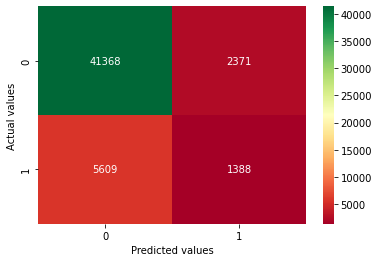

In [19]:
# # training and fitting Decision tree to model
# from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier()
# print(dt.fit(x_train, y_train))

# # Saving model into a file 
# joblib.dump(dt,'decision_tree_model')

# Loading model
dt_loaded = joblib.load('decision_tree_model')

# Making predictions on decision tree
dt_pre = dt_loaded.predict(x_test)
print(dt_pre.shape)

#the number of correct and incorrect prediction
print("..........................................................................................")
print("the number of correct prediction of dt is:" ,sum(dt_pre==y_test))
print("the number of incorrect predictions of dt is:",sum(dt_pre!=y_test))

# calculating accuracy of decision tree
accuracy = dt_loaded.score(x_test, y_test)
print("accuracy of dt = ", accuracy * 100, "%")

# #drawing dt
# from sklearn import tree
# plt.figure(figsize=(15,10))
# tree.plot_tree(dt_loaded,filled= True)
# plt.show()

# Making confusion matrix on decision tree
cmofdt = confusion_matrix(y_test, dt_pre)
print(cmofdt)
h = sns.heatmap(cmofdt, annot=True, cmap="RdYlGn", fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()


In [20]:
# calculate precision,recall and f1-score for LogisticRegression
from sklearn.metrics import classification_report
print("...........................................................................")
print("classification report of lr","\n",classification_report(y_test, lr_pre, digits=4))

# calculate precision,recall and f1-score for svm
print("...........................................................................")
print("classification report of svm","\n",classification_report(y_test, svm_pre, digits=4))

# calculate precision,recall and f1-score for DecisionTree
print("...........................................................................")
print("classification report of dt","\n",classification_report(y_test, dt_pre, digits=4))

...........................................................................
classification report of lr 
               precision    recall  f1-score   support

         0.0     0.8804    0.9658    0.9211     43739
         1.0     0.4570    0.1802    0.2585      6997

    accuracy                         0.8574     50736
   macro avg     0.6687    0.5730    0.5898     50736
weighted avg     0.8221    0.8574    0.8297     50736

...........................................................................
classification report of svm 
               precision    recall  f1-score   support

         0.0     0.8712    0.9867    0.9253     43739
         1.0     0.5129    0.0878    0.1499      6997

    accuracy                         0.8627     50736
   macro avg     0.6921    0.5372    0.5376     50736
weighted avg     0.8218    0.8627    0.8184     50736

...........................................................................
classification report of dt 
               precision    

In [21]:
# # Voting Classifier #
# from sklearn.ensemble import VotingClassifier
# VotingClassifierModel=VotingClassifier(estimators=[('LogisticRegression Model',lr_loaded),('SVM Model',sv_loaded),
#                                               ('Decision Tree Model',dt_loaded)],voting='hard')
# VotingClassifierModel.fit(x_train,y_train)
# # Saving model
# joblib.dump(VotingClassifierModel,'voting_classifier_model')

# Loading the model 
vc_loaded=joblib.load('voting_classifier_model')

print('Voting Classifier Model Train Score is: ',vc_loaded.score(x_train,y_train)*100,"%")
print('Voting Classifier Model Test Score is: ',vc_loaded.score(x_test,y_test)*100,"%")



Voting Classifier Model Train Score is:  85.87935588142543 %
Voting Classifier Model Test Score is:  86.0868022705771 %


In [25]:
#Logestic regression hyperparameters

# import numpy as np
# param_grid = [    
#     {'penalty' : ['none'],
#     'C' : np.logspace(0,1),
#     'solver' : ['saga'],
#     'max_iter' : [1000]
#     }
# ]

# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(lr_loaded, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
# best_clf = clf.fit(x,y)

# # Saving 
# joblib.dump(best_clf,'hyperparameters_lr')

#Load 
loaded_best=joblib.load('hyperparameters_lr')

print(loaded_best.best_estimator_)

print (f'Accuracy - : {loaded_best.score(x,y)*100}',"%")

LogisticRegression(max_iter=1000, penalty='none', random_state=0, solver='saga')
Accuracy - : 86.31543677073479 %
